###  Intro:

In [1]:
#Import basic libraries and create dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank_full.csv.zip')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### EDA
 Notes:
 

* check null
* check uniques
* check hist's for normality and distribution
* check and understand outliers
* understand data in each column
* strategize for 'unknown' results in categorical
* ohe categoricals

###  Important!!!!

* Look to minimize predicted non subscribers that are actual subs

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [4]:
numerical = []
categorical = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical.append(col)
    elif df[col].dtype == np.object:
        categorical.append(col)
        
numerical, categorical

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'Target'])

In [5]:
num_df = df[numerical]
num_df

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [6]:
binary_cat = []
for col in categorical:
    if len(df[col].value_counts()) <= 3:
        binary_cat.append(col)

for col in binary_cat:
    print(df[col].value_counts(), '\n')

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

no     39922
yes     5289
Name: Target, dtype: int64 



# Check outliers in numerical features

### Age

In [7]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

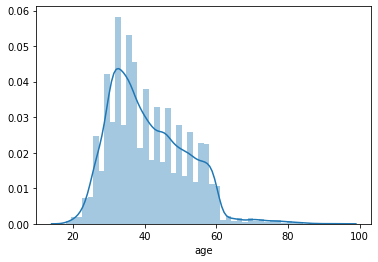

In [8]:
sns.distplot(df.age)

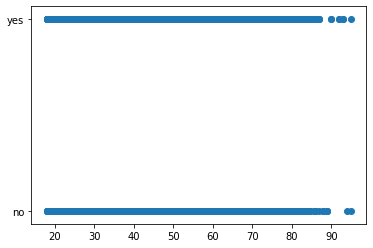

In [9]:
plt.scatter(df.age, df.Target)

In [10]:
num_df

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [12]:
print(num_df.age.value_counts())

print(num_df.age.min(), num_df.age.max())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
18 95


In [13]:
(95-18)/4

19.25

In [14]:
def age_bins(df):
    """
    classifies age into 4 groups and assigns a value
    
    """
    df.loc[df.age <= 37, 'age'] = 1
    df.loc[(df.age > 37) & (df.age <= 56), 'age'] = 2
    df.loc[(df.age > 56) & (df.age <= 75), 'age'] = 3
    df.loc[df.age > 75, 'age'] = 4
    
    return(df)
    

In [15]:
age_bins(num_df)
num_df.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import 

,age,balance,day,duration,campaign,pdays,previous
0,3,2143,5,261,1,-1,0
1,2,29,5,151,1,-1,0
2,1,2,5,76,1,-1,0
3,2,1506,5,92,1,-1,0
4,1,1,5,198,1,-1,0


In [16]:
num_df.age.value_counts()

2    20680
1    20409
3     3861
4      261
Name: age, dtype: int64

In [18]:
cat_df = df[categorical]

for col in cat_df.columns:
    print(df[col].value_counts(), '\n')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

In [25]:
label_list = [el for el in cat_df.job.value_counts().index]
label_list

['blue-collar',
 'management',
 'technician',
 'admin.',
 'services',
 'retired',
 'self-employed',
 'entrepreneur',
 'unemployed',
 'housemaid',
 'student',
 'unknown']

In [ ]:
#def simple_encoder(df):
#    """
#    Input dataframe with categorical variables
#    
#    returns dataframe with categoricals encoded as int from 0 to len(category.value_counts())
#    """
#    
#    unk = 'unknown'
#    for col in df.columns:
#        label_list = [el for el in df[col].value_counts().index]
#        num = len(label_list)
#        
        
    

In [26]:
# job encoder

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

cat_df.job = encoder.fit_transform(cat_df.job)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
cat_df.job.value_counts()

1     9732
4     9458
9     7597
0     5171
7     4154
5     2264
6     1579
2     1487
10    1303
3     1240
8      938
11     288
Name: job, dtype: int64

In [28]:
def label_encoder(df):
    """
    Inputs dataframe
    Outputs dataframe with categoricals encoded using LabelEncoder
    """
    
    for col in df.columns:
        df[col] = encoder.fit_transform(df[col])
        
    return(df)

In [36]:
num_df.head()

,age,balance,day,duration,campaign,pdays,previous
0,3,2143,5,261,1,-1,0
1,2,29,5,151,1,-1,0
2,1,2,5,76,1,-1,0
3,2,1506,5,92,1,-1,0
4,1,1,5,198,1,-1,0


In [38]:
cat_df.month.value_counts()

8     13766
5      6895
1      6247
6      5341
9      3970
0      2932
3      2649
4      1403
10      738
11      579
7       477
2       214
Name: month, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split


print(num_df.head(), '\n')
print('\n', cat_df.head())




   age  balance  day  duration  campaign  pdays  previous
0    3     2143    5       261         1     -1         0
1    2       29    5       151         1     -1         0
2    1        2    5        76         1     -1         0
3    2     1506    5        92         1     -1         0
4    1        1    5       198         1     -1         0 


    job  marital  education  default  housing  loan  contact  month  poutcome  \
0    4        1          2        0        1     0        2      8         3   
1    9        2          1        0        1     0        2      8         3   
2    2        1          1        0        1     1        2      8         3   
3    1        1          3        0        1     0        2      8         3   
4   11        2          3        0        0     0        2      8         3   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [45]:
model_data = pd.concat([num_df, cat_df], axis=1)
model_data.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,3,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,2,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,1,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,2,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,1,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [50]:
X = model_data.drop(columns=['Target'])
y = model_data.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=31)

In [72]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

smote = SMOTE()
X_resamp, y_resamp = smote.fit_sample(X_train, y_train)

logreg = LogisticRegression(fit_intercept=False, random_state=31, solver='liblinear')
mod_reg = logreg.fit(X_resamp, y_resamp)

y_score = logreg.fit(X_resamp, y_resamp).decision_function(X_test)
y_pred = logreg.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix


array([[10103,  1906],
       [  479,  1076]])

In [73]:
acc = (cnf_matrix[0][0] + cnf_matrix[1][1])/(cnf_matrix.sum())
acc

0.8241669124152168

In [74]:
fpr, tpr, thresholds = roc_curve(y_pred, y_score)

In [75]:
auc(fpr, tpr)

1.0